# Lab 1 - New York City 5 Boroughs Crimes Data

Team:  Brian Gaither, Aurian Ghaemmaghami, Drew Larsen and Sabrina Purvis

# Model Creation and Understanding

We are exploring both Logistic Regression and Random Forest Classification to determine if crimes classify is either "Violent" or "Non-Violent". 

Accuracy and specificity will be our main benchmarks of model effectiveness as we are trying to correctly minimize our false positive rate of classifying a crime to be violent. Model effectiveness will be measured by an accuracy threshold of at least 70%, as well as, a specificity rate of 70%.

### Assumptions

In logistic regression, there are a few assumptions that must be considered.  
 - For this evaluation, we determined that we are solving for a binary classification of 'Violent' and 'Non-Violent' crimes.  In binary classification, the dependent variable must be binary; we must only have two outcomes. 
 - The second assumption to consider is independence.  The dataset may not use a method such as repeated measures.  Our dataset, as far as we understand, has measured unique, independent crime activities.
 - The third assumption or requirement is that the selected data must have little or no multicollinearity among the variables.  During our Exploratory Data Analysis, we did identify that we had correlation between months and temperature data.  We did not include the weather data in this modeling.  
 - A final requirement for logistic regression is a 'large' sample size.  At an original dataset of 1.4M observations, we comfortably met this metric.

### Binary Variable Classification Curation

There were 64 unique possibilities of crimes that were recroded in our dataset. Initially, we explored different avenues of multi-class classification, but those techniques added higher complexity and class imbalances. Ultimately, we managed to classify all 64 different types of crimes into two main subgroups: Violent vs Non-Violent. 

Our team has leveraged https://www1.nyc.gov/site/nypd/stats/crime-statistics/crime-statistics-landing.page as a benchmark to accurately classify each of our unique crimes into the binary subgroup descrbed above to continue on with our analysis. 

### Parameter Tuning

# Model 1 - Logistic Regression Model

### Model Description

The first activity that had to occur was data manipulation, to dummy encode our categorical variables.  With a ratio of roughly 30/70 split on violent versus non-violent incidents, we also upsampled our dataset to balance it.

### Setting Up the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
crime = pd.read_csv('Training_and_Test_Set.csv') # read in the csv %%file

In [3]:
crime.dtypes #ensuring the data read in correctly

JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
Day_Name              object
Duration             float64
Duration_to_PD       float64
Month                 object
Day                  float64
Year                 float64
Duration_lbl          object
Season                object
Daytime               object
GeoCell              float64
GeoCell_X            float64
GeoCell_Y            float64
y                      int64
dtype: object

In [4]:
crime.head()

,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,Day_Name,Duration,Duration_to_PD,Month,Day,Year,Duration_lbl,Season,Daytime,GeoCell,GeoCell_X,GeoCell_Y,y
0,N.Y. POLICE DEPT,STATEN ISLAND,120.0,INSIDE,COMMERCIAL BUILDING,Friday,3.0,0.0,September,5.0,2014.0,Short,Fall,Morning,23.0,3.0,3.0,0
1,N.Y. POLICE DEPT,STATEN ISLAND,121.0,INSIDE,RESIDENCE-HOUSE,Sunday,1.0,0.0,December,27.0,2015.0,Short,Winter,Day,23.0,3.0,3.0,1
2,N.Y. POLICE DEPT,BRONX,43.0,INSIDE,RESIDENCE - APT. HOUSE,Sunday,14.0,171.0,September,1.0,2013.0,Medium,Fall,Night,78.0,8.0,8.0,0
3,N.Y. POLICE DEPT,BROOKLYN,75.0,INSIDE,RESIDENCE-HOUSE,Friday,6.0,28.0,October,10.0,2014.0,Short,Fall,Day,47.0,7.0,5.0,0
4,N.Y. POLICE DEPT,MANHATTAN,6.0,FRONT OF,STREET,Sunday,1.0,0.0,September,28.0,2014.0,Short,Fall,Early Morning,55.0,5.0,6.0,0


In [5]:
#Value Counts by Crime Type - note the ration of Violent [0] vs Non-Violent [1]?
crime['y'].value_counts()

0    365333
1    163540
Name: y, dtype: int64

In [6]:
#dropping any remaining NANs
crime = crime.dropna() 

In [7]:
#confirming that we don't have any NaN's
crime.isnull().values.any()

False

In [8]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528873 entries, 0 to 528872
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   JURIS_DESC         528873 non-null  object 
 1   BORO_NM            528873 non-null  object 
 2   ADDR_PCT_CD        528873 non-null  float64
 3   LOC_OF_OCCUR_DESC  528873 non-null  object 
 4   PREM_TYP_DESC      528873 non-null  object 
 5   Day_Name           528873 non-null  object 
 6   Duration           528873 non-null  float64
 7   Duration_to_PD     528873 non-null  float64
 8   Month              528873 non-null  object 
 9   Day                528873 non-null  float64
 10  Year               528873 non-null  float64
 11  Duration_lbl       528873 non-null  object 
 12  Season             528873 non-null  object 
 13  Daytime            528873 non-null  object 
 14  GeoCell            528873 non-null  float64
 15  GeoCell_X          528873 non-null  float64
 16  Ge

In [9]:
# perform one-hot encoding of the categorical data on 'JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC',
#'ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime'
tmp_df = pd.get_dummies(crime.JURIS_DESC,prefix='JURIS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.BORO_NM,prefix='BORO_NM')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Day_Name,prefix='Day_Name')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Month,prefix='Month')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Duration_lbl,prefix='Duration_lbl')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Season,prefix='Season')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='Daytime')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

In [10]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528873 entries, 0 to 528872
Columns: 225 entries, JURIS_DESC to Daytime_Night
dtypes: float64(8), int64(1), object(9), uint8(207)
memory usage: 181.1+ MB


In [11]:
#Now we drop the original variables
if 'JURIS_DESC' in crime:    
    del crime['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'BORO_NM' in crime:    
    del crime['BORO_NM'] # get rid of the original category as it is now one-hot encoded
if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
if 'ADDR_PCT_CD' in crime:    
    del crime['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
if 'PREM_TYP_DESC' in crime:    
    del crime['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in crime:    
    del crime['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in crime:    
    del crime['Month'] # get rid of the original category as it is now one-hot encoded
if 'Duration_lbl' in crime:    
    del crime['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
if 'Season' in crime:    
    del crime['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in crime:    
    del crime['Daytime'] # get rid of the original category as it is now one-hot encoded

In [12]:
#confirming what was changed
pd.set_option('display.max_rows', 300)
crime.dtypes

Duration                                      float64
Duration_to_PD                                float64
Day                                           float64
Year                                          float64
GeoCell                                       float64
GeoCell_X                                     float64
GeoCell_Y                                     float64
y                                               int64
JURIS_DESC_AMTRACK                              uint8
JURIS_DESC_DEPT OF CORRECTIONS                  uint8
JURIS_DESC_HEALTH & HOSP CORP                   uint8
JURIS_DESC_LONG ISLAND RAILRD                   uint8
JURIS_DESC_METRO NORTH                          uint8
JURIS_DESC_N.Y. HOUSING POLICE                  uint8
JURIS_DESC_N.Y. POLICE DEPT                     uint8
JURIS_DESC_N.Y. STATE PARKS                     uint8
JURIS_DESC_N.Y. STATE POLICE                    uint8
JURIS_DESC_N.Y. TRANSIT POLICE                  uint8
JURIS_DESC_NEW YORK CITY SHE

### Balancing the Dataset

As noted previously, the dataset was not balanced.  Based on iterative testing, we determined that we would balance the data before fitting to optimize the results.

In [13]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'y' in crime:
    y = crime['y'].values # get the labels we want
    del crime['y'] # get rid of the class label
    X = crime.values # use everything else to predict!

In [14]:
from imblearn.over_sampling import SMOTE
#transform (balance) the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

### Parameters

### Logistic Regression Model: Iteration 1

In [15]:
#Creating the object to do 3 fold cross validation.  We have defined an 80/20 split on the data as well
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [16]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# Creating the Logistic Regression Object
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

In [17]:
iter_num=0

In [18]:
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 

    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logistic regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.7186075793449848
confusion matrix
 [[45986 27172]
 [13949 59027]]
====Iteration 1  ====
accuracy 0.7193466270683072
confusion matrix
 [[46221 27127]
 [13886 58900]]
====Iteration 2  ====
accuracy 0.7190729056892988
confusion matrix
 [[45952 26887]
 [14166 59129]]


In [19]:
#printing just accuracies
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.72238493 0.72086578 0.72009252]


In [20]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None,solver='liblinear') # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05),__manual=True)

interactive(children=(FloatSlider(value=2.451, description='cost', max=5.0, min=0.001, step=0.05), Output()), …

<function __main__.lr_explor(cost)>

In [21]:
# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = crime.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])
# by running the data model this way, we have not yet scaled the data - that step is next

Duration has weight of -0.35917563225859384
Duration_to_PD has weight of -0.00017360665587026183
Day has weight of 0.00028685259109663
Year has weight of 0.0011265934118900572
GeoCell has weight of 0.04740902219803416
GeoCell_X has weight of -0.035805924023633987
GeoCell_Y has weight of -0.4591963435146753
JURIS_DESC_AMTRACK has weight of 0.2642909971705286
JURIS_DESC_DEPT OF CORRECTIONS has weight of -0.06480897515383675
JURIS_DESC_HEALTH & HOSP CORP has weight of 0.6804854541452097
JURIS_DESC_LONG ISLAND RAILRD has weight of -0.2910599785249865
JURIS_DESC_METRO NORTH has weight of 0.62158229260959
JURIS_DESC_N.Y. HOUSING POLICE has weight of 0.10309193801316034
JURIS_DESC_N.Y. POLICE DEPT has weight of 0.208275065056534
JURIS_DESC_N.Y. STATE PARKS has weight of -0.10021400154449037
JURIS_DESC_N.Y. STATE POLICE has weight of -0.3030951112649326
JURIS_DESC_N.Y. TRANSIT POLICE has weight of -0.787094215566247
JURIS_DESC_NEW YORK CITY SHERIFF OFFICE has weight of 0.3129557675596584
JURIS

In [22]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

accuracy: 0.7193192549304064
[[45971 26868]
 [14149 59146]]


In [23]:
# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,crime.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

Duration has weight of -1.7195881367229278
PREM_TYP_DESC_DEPARTMENT STORE has weight of -0.41290479142796704
Duration_lbl_Short has weight of -0.3825597028039069
PREM_TYP_DESC_CHAIN STORE has weight of -0.3253698647905225
PREM_TYP_DESC_DRUG STORE has weight of -0.23705705531448132
PREM_TYP_DESC_CLOTHING/BOUTIQUE has weight of -0.23526101590618234
LOC_OF_OCCUR_DESC_OPPOSITE OF has weight of -0.1639934590946728
LOC_OF_OCCUR_DESC_REAR OF has weight of -0.15784600859016729
PREM_TYP_DESC_FOOD SUPERMARKET has weight of -0.1445907211380509
PREM_TYP_DESC_GYM/FITNESS FACILITY has weight of -0.10583807454703416
PREM_TYP_DESC_COMMERCIAL BUILDING has weight of -0.10405395327355062
PREM_TYP_DESC_BANK has weight of -0.10294593824787816
PREM_TYP_DESC_ATM has weight of -0.09352408770965889
PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE) has weight of -0.06954172026656716
PREM_TYP_DESC_TELECOMM. STORE has weight of -0.06904602361583512
PREM_TYP_DESC_STORE UNCLASSIFIED has weight of -0.06854145068278839
PREM

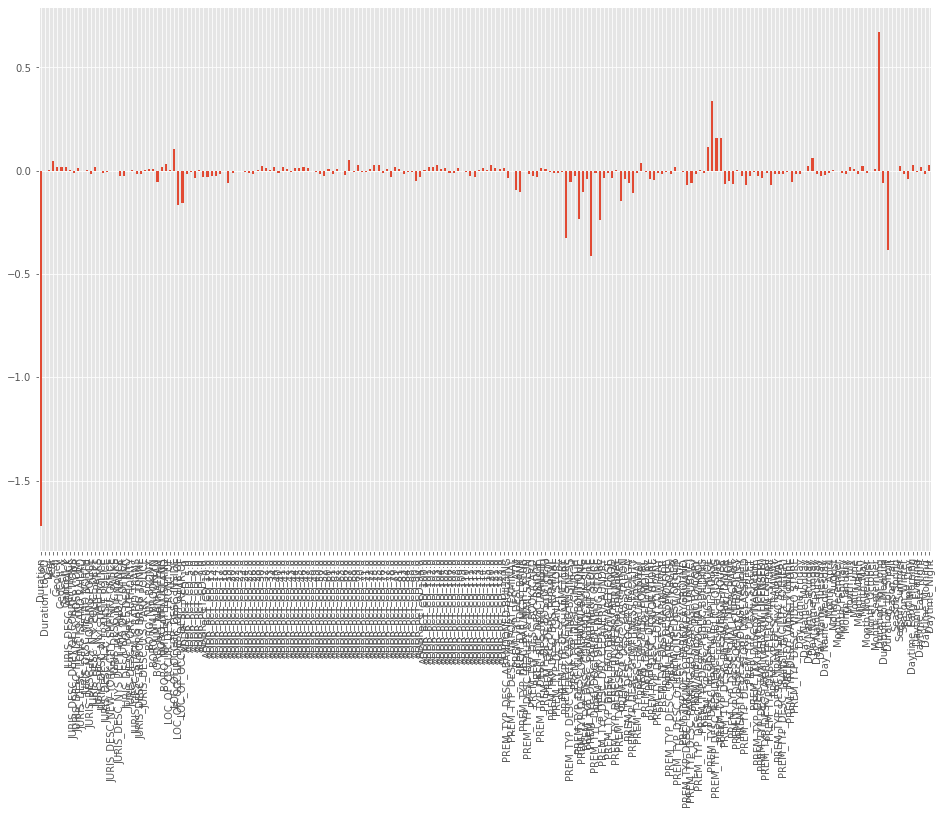

In [24]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=crime.columns)
weights.plot(kind='bar', figsize = (16,10))
plt.show()

In [25]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import *
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69     72839
           1       0.69      0.81      0.74     73295

    accuracy                           0.72    146134
   macro avg       0.73      0.72      0.72    146134
weighted avg       0.73      0.72      0.72    146134



In [26]:
zip_vars #this lists out the weights in a slightly more readable list

[(array([-1.71958814]), 'Duration'),
 (array([-0.41290479]), 'PREM_TYP_DESC_DEPARTMENT STORE'),
 (array([-0.3825597]), 'Duration_lbl_Short'),
 (array([-0.32536986]), 'PREM_TYP_DESC_CHAIN STORE'),
 (array([-0.23705706]), 'PREM_TYP_DESC_DRUG STORE'),
 (array([-0.23526102]), 'PREM_TYP_DESC_CLOTHING/BOUTIQUE'),
 (array([-0.16399346]), 'LOC_OF_OCCUR_DESC_OPPOSITE OF'),
 (array([-0.15784601]), 'LOC_OF_OCCUR_DESC_REAR OF'),
 (array([-0.14459072]), 'PREM_TYP_DESC_FOOD SUPERMARKET'),
 (array([-0.10583807]), 'PREM_TYP_DESC_GYM/FITNESS FACILITY'),
 (array([-0.10405395]), 'PREM_TYP_DESC_COMMERCIAL BUILDING'),
 (array([-0.10294594]), 'PREM_TYP_DESC_BANK'),
 (array([-0.09352409]), 'PREM_TYP_DESC_ATM'),
 (array([-0.06954172]), 'PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE)'),
 (array([-0.06904602]), 'PREM_TYP_DESC_TELECOMM. STORE'),
 (array([-0.06854145]), 'PREM_TYP_DESC_STORE UNCLASSIFIED'),
 (array([-0.06420881]), 'PREM_TYP_DESC_RESTAURANT/DINER'),
 (array([-0.06379496]), 'PREM_TYP_DESC_SMALL MERCHANT

### Logistic Regression Model: Iteration 2

For the next iteration of the model evaluation, we are using a subset of variables based on an importance threshold set at |.03| from the initial model created

In [27]:
import pandas as pd
import numpy as np

In [28]:
crime = pd.read_csv('Training_and_Test_Set.csv') # read in the csv %%file

In [29]:
crime.dtypes #data check that it read in correctly

JURIS_DESC            object
BORO_NM               object
ADDR_PCT_CD          float64
LOC_OF_OCCUR_DESC     object
PREM_TYP_DESC         object
Day_Name              object
Duration             float64
Duration_to_PD       float64
Month                 object
Day                  float64
Year                 float64
Duration_lbl          object
Season                object
Daytime               object
GeoCell              float64
GeoCell_X            float64
GeoCell_Y            float64
y                      int64
dtype: object

In [30]:
#Value Counts by Crime Type
crime['y'].value_counts()

0    365333
1    163540
Name: y, dtype: int64

In [31]:
#dropping any remaining NANs
crime = crime.dropna() 

In [32]:
crime.isnull().values.any()

False

In [33]:
# perform one-hot encoding of the categorical data on 'JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC',
#'ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime'
tmp_df = pd.get_dummies(crime.JURIS_DESC,prefix='JURIS_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.BORO_NM,prefix='BORO_NM')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Day_Name,prefix='Day_Name')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Month,prefix='Month')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Duration_lbl,prefix='Duration_lbl')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Season,prefix='Season')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(crime.Daytime,prefix='Daytime')
crime = pd.concat((crime,tmp_df),axis=1) # add back into the dataframe

In [34]:
#Now we drop the original variables
if 'JURIS_DESC' in crime:    
    del crime['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'BORO_NM' in crime:    
    del crime['BORO_NM'] # get rid of the original category as it is now one-hot encoded
if 'LOC_OF_OCCUR_DESC' in crime:    
    del crime['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
if 'ADDR_PCT_CD' in crime:    
    del crime['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
if 'PREM_TYP_DESC' in crime:    
    del crime['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in crime:    
    del crime['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in crime:    
    del crime['Month'] # get rid of the original category as it is now one-hot encoded
if 'Duration_lbl' in crime:    
    del crime['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
if 'Season' in crime:    
    del crime['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in crime:    
    del crime['Daytime'] # get rid of the original category as it is now one-hot encoded

In [35]:
#Now I want to pare down the variables - cutting off at  |.03|%
X_sm = crime[[ 'PREM_TYP_DESC_HIGHWAY/PARKWAY', 'BORO_NM_MANHATTAN', 'BORO_NM_QUEENS', 'GeoCell_X', 'Year',
          'ADDR_PCT_CD_66.0', 'Day_Name_Saturday', 'LOC_OF_OCCUR_DESC_FRONT OF', 'PREM_TYP_DESC_PUBLIC BUILDING', 
          'PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING', 'PREM_TYP_DESC_RESIDENCE - APT. HOUSE', 
          'PREM_TYP_DESC_PUBLIC SCHOOL', 'Month_September', 'Duration', 'PREM_TYP_DESC_CONSTRUCTION SITE',
          'Duration_lbl_Medium', 'PREM_TYP_DESC_CEMETERY', 'PREM_TYP_DESC_CHURCH', 'PREM_TYP_DESC_DOCTOR/DENTIST OFFICE',
          'LOC_OF_OCCUR_DESC_INSIDE', 'LOC_OF_OCCUR_DESC_OPPOSITE OF', 'PREM_TYP_DESC_FERRY/FERRY TERMINAL',
          'PREM_TYP_DESC_GROCERY/BODEGA', 'PREM_TYP_DESC_CLOTHING/BOUTIQUE', 'PREM_TYP_DESC_ATM', 'PREM_TYP_DESC_AIRPORT TERMINAL',  'PREM_TYP_DESC_TAXI/LIVERY (UNLICENSED)',  'PREM_TYP_DESC_STORAGE FACILITY', 
          'PREM_TYP_DESC_PARK/PLAYGROUND', 'PREM_TYP_DESC_SHOE', 'PREM_TYP_DESC_RESIDENCE-HOUSE', 
          'PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE)', 'ADDR_PCT_CD_18.0', 'PREM_TYP_DESC_GAS STATION',
          'Duration_lbl_Long', 'PREM_TYP_DESC_CHAIN STORE', 'PREM_TYP_DESC_TUNNEL', 'PREM_TYP_DESC_RESTAURANT/DINER',          'BORO_NM_BROOKLYN',  'PREM_TYP_DESC_JEWELRY',  'ADDR_PCT_CD_88.0',  'PREM_TYP_DESC_HOTEL/MOTEL', 
          'Season_Winter', 'PREM_TYP_DESC_FOOD SUPERMARKET', 'PREM_TYP_DESC_BOOK/CARD', 'PREM_TYP_DESC_FACTORY/WAREHOUSE',          'ADDR_PCT_CD_123.0',  'PREM_TYP_DESC_DRUG STORE',  'PREM_TYP_DESC_COMMERCIAL BUILDING', 
          'PREM_TYP_DESC_TAXI (LIVERY LICENSED)', 'ADDR_PCT_CD_111.0', 'ADDR_PCT_CD_5.0', 'ADDR_PCT_CD_7.0', 
          'ADDR_PCT_CD_110.0', 'ADDR_PCT_CD_9.0','y']]

In [36]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'y' in X_sm:
    y = X_sm['y'].values # get the labels we want
    del X_sm['y'] # get rid of the class label
    X = X_sm.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn

In [37]:
from imblearn.over_sampling import SMOTE

#transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X,y)

In [38]:
y.shape

(730666,)

In [39]:
X.shape

(730666, 55)

In [40]:
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [41]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

====Iteration 0  ====
accuracy 0.6937194629586544
confusion matrix
 [[45553 27378]
 [17380 55823]]
====Iteration 1  ====
accuracy 0.6966756538519441
confusion matrix
 [[45495 27350]
 [16976 56313]]
====Iteration 2  ====
accuracy 0.6959366061286216
confusion matrix
 [[45777 27429]
 [17005 55923]]


In [42]:
# and here is an even shorter way of getting the accuracies for each training and test set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.69463643 0.69631297 0.69523862]


In [43]:
# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = X_sm.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])
    
# does this look correct? 

PREM_TYP_DESC_HIGHWAY/PARKWAY has weight of -0.8083624481852504
BORO_NM_MANHATTAN has weight of -0.3023822110409794
BORO_NM_QUEENS has weight of -0.05462462475709064
GeoCell_X has weight of 0.028182448462826526
Year has weight of -0.00027840657282975344
ADDR_PCT_CD_66.0 has weight of -0.15818813305345678
Day_Name_Saturday has weight of 0.05944456851934535
LOC_OF_OCCUR_DESC_FRONT OF has weight of 1.0448552279367511
PREM_TYP_DESC_PUBLIC BUILDING has weight of 0.2052768157163573
PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING has weight of 0.795484429832201
PREM_TYP_DESC_RESIDENCE - APT. HOUSE has weight of 1.0808981808705047
PREM_TYP_DESC_PUBLIC SCHOOL has weight of 1.2782759251136266
Month_September has weight of -0.05347540660518815
Duration has weight of -0.35056199816738537
PREM_TYP_DESC_CONSTRUCTION SITE has weight of -0.7462432047199965
Duration_lbl_Medium has weight of 0.9155189760381567
PREM_TYP_DESC_CEMETERY has weight of -0.11872939010180734
PREM_TYP_DESC_CHURCH has weight of -0.34292

In [44]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,X_sm.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.6959981934388986
[[45872 27334]
 [17091 55837]]
Duration has weight of -1.6714172211939748
PREM_TYP_DESC_CHAIN STORE has weight of -0.25850903479519755
PREM_TYP_DESC_CLOTHING/BOUTIQUE has weight of -0.20717493457031722
PREM_TYP_DESC_DRUG STORE has weight of -0.1978079095512061
BORO_NM_MANHATTAN has weight of -0.12537690843091046
PREM_TYP_DESC_FOOD SUPERMARKET has weight of -0.11044385084354136
PREM_TYP_DESC_ATM has weight of -0.08523409857673436
PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE) has weight of -0.05533229001855758
PREM_TYP_DESC_SHOE has weight of -0.04700029911007844
PREM_TYP_DESC_COMMERCIAL BUILDING has weight of -0.04361157031517991
Season_Winter has weight of -0.03962564269393395
ADDR_PCT_CD_110.0 has weight of -0.035381886670958505
BORO_NM_BROOKLYN has weight of -0.03232192345375007
PREM_TYP_DESC_JEWELRY has weight of -0.030463180638882564
ADDR_PCT_CD_111.0 has weight of -0.03024059587218317
PREM_TYP_DESC_GAS STATION has weight of -0.029084034459150178
PREM_TYP_

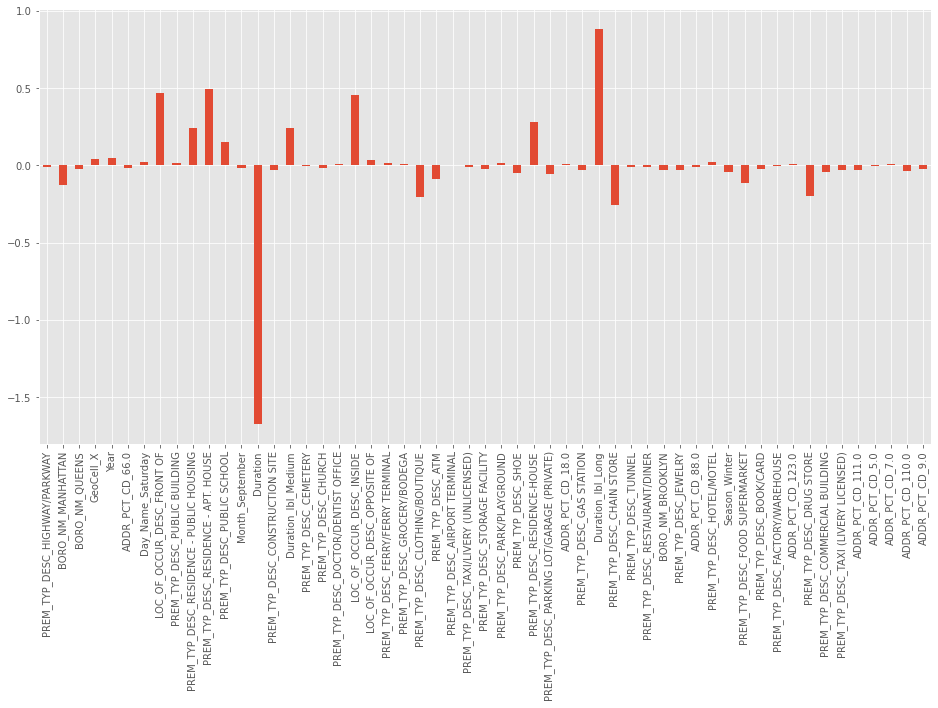

In [45]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=X_sm.columns)
weights.plot(kind='bar', figsize = (16,8))  #added figsize - trying to see if it expands the view
plt.show()

### Interpretation

### ROC Curve and Thresholds

### Performance Metrics

In [46]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import *
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.73      0.63      0.67     73206
           1       0.67      0.77      0.72     72928

    accuracy                           0.70    146134
   macro avg       0.70      0.70      0.69    146134
weighted avg       0.70      0.70      0.69    146134



# Model 2 - Random Forest Classification

### Model Description

### Parameters

### Interpretation

### ROC Curve and Thresholds

### Performance Metrics

# Model Validation

### Model 1, Logistic Regression - Pros and Cons

#### Holdout Testing

In [47]:
#test model against the holdout set
holdout = pd.read_csv('Hold_Out_Set.csv')

In [48]:
#check for nulls
holdout.isnull().values.any()

False

In [49]:
# perform one-hot encoding of the categorical data on 'JURIS_DESC','BORO_NM','LOC_OF_OCCUR_DESC',
#'ADDR_PCT_CD','PREM_TYP_DESC','Day_Name','Month','Duration_lbl','Season','Daytime'
tmp_df = pd.get_dummies(holdout.JURIS_DESC,prefix='JURIS_DESC')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.BORO_NM,prefix='BORO_NM')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.LOC_OF_OCCUR_DESC,prefix='LOC_OF_OCCUR_DESC')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.ADDR_PCT_CD,prefix='ADDR_PCT_CD')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.PREM_TYP_DESC,prefix='PREM_TYP_DESC')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.Day_Name,prefix='Day_Name')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.Month,prefix='Month')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.Duration_lbl,prefix='Duration_lbl')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.Season,prefix='Season')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(holdout.Daytime,prefix='Daytime')
holdout = pd.concat((holdout,tmp_df),axis=1) # add back into the dataframe

In [50]:
#Now we drop the original variables
if 'JURIS_DESC' in holdout:    
    del holdout['JURIS_DESC'] # get rid of the original category as it is now one-hot encoded
if 'BORO_NM' in holdout:    
    del holdout['BORO_NM'] # get rid of the original category as it is now one-hot encoded
if 'LOC_OF_OCCUR_DESC' in holdout:    
    del holdout['LOC_OF_OCCUR_DESC'] # get rid of the original category as it is now one-hot encoded
if 'ADDR_PCT_CD' in holdout:    
    del holdout['ADDR_PCT_CD'] # get rid of the original category as it is now one-hot encoded
if 'PREM_TYP_DESC' in holdout:    
    del holdout['PREM_TYP_DESC'] # get rid of the original category as it is now one-hot encoded
if 'Day_Name' in holdout:    
    del holdout['Day_Name'] # get rid of the original category as it is now one-hot encoded
if 'Month' in holdout:    
    del holdout['Month'] # get rid of the original category as it is now one-hot encoded
if 'Duration_lbl' in holdout:    
    del holdout['Duration_lbl'] # get rid of the original category as it is now one-hot encoded
if 'Season' in holdout:    
    del holdout['Season'] # get rid of the original category as it is now one-hot encoded
if 'Daytime' in holdout:    
    del holdout['Daytime'] # get rid of the original category as it is now one-hot encoded

In [51]:
#Now I want to pare down the variables - replicating the original adjustment cutting off at  |.03|%
holdout = holdout[[ 'PREM_TYP_DESC_HIGHWAY/PARKWAY', 'BORO_NM_MANHATTAN', 'BORO_NM_QUEENS', 'GeoCell_X', 'Year',
          'ADDR_PCT_CD_66.0', 'Day_Name_Saturday', 'LOC_OF_OCCUR_DESC_FRONT OF', 'PREM_TYP_DESC_PUBLIC BUILDING', 
          'PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING', 'PREM_TYP_DESC_RESIDENCE - APT. HOUSE', 
          'PREM_TYP_DESC_PUBLIC SCHOOL', 'Month_September', 'Duration', 'PREM_TYP_DESC_CONSTRUCTION SITE',
          'Duration_lbl_Medium', 'PREM_TYP_DESC_CEMETERY', 'PREM_TYP_DESC_CHURCH', 'PREM_TYP_DESC_DOCTOR/DENTIST OFFICE',
          'LOC_OF_OCCUR_DESC_INSIDE', 'LOC_OF_OCCUR_DESC_OPPOSITE OF', 'PREM_TYP_DESC_FERRY/FERRY TERMINAL',
          'PREM_TYP_DESC_GROCERY/BODEGA', 'PREM_TYP_DESC_CLOTHING/BOUTIQUE', 'PREM_TYP_DESC_ATM', 'PREM_TYP_DESC_AIRPORT TERMINAL',  'PREM_TYP_DESC_TAXI/LIVERY (UNLICENSED)',  'PREM_TYP_DESC_STORAGE FACILITY', 
          'PREM_TYP_DESC_PARK/PLAYGROUND', 'PREM_TYP_DESC_SHOE', 'PREM_TYP_DESC_RESIDENCE-HOUSE', 
          'PREM_TYP_DESC_PARKING LOT/GARAGE (PRIVATE)', 'ADDR_PCT_CD_18.0', 'PREM_TYP_DESC_GAS STATION',
          'Duration_lbl_Long', 'PREM_TYP_DESC_CHAIN STORE', 'PREM_TYP_DESC_TUNNEL', 'PREM_TYP_DESC_RESTAURANT/DINER',          'BORO_NM_BROOKLYN',  'PREM_TYP_DESC_JEWELRY',  'ADDR_PCT_CD_88.0',  'PREM_TYP_DESC_HOTEL/MOTEL', 
          'Season_Winter', 'PREM_TYP_DESC_FOOD SUPERMARKET', 'PREM_TYP_DESC_BOOK/CARD', 'PREM_TYP_DESC_FACTORY/WAREHOUSE',          'ADDR_PCT_CD_123.0',  'PREM_TYP_DESC_DRUG STORE',  'PREM_TYP_DESC_COMMERCIAL BUILDING', 
          'PREM_TYP_DESC_TAXI (LIVERY LICENSED)', 'ADDR_PCT_CD_111.0', 'ADDR_PCT_CD_5.0', 'ADDR_PCT_CD_7.0', 
          'ADDR_PCT_CD_110.0', 'ADDR_PCT_CD_9.0','y']]

In [52]:
holdout.head()

,PREM_TYP_DESC_HIGHWAY/PARKWAY,BORO_NM_MANHATTAN,BORO_NM_QUEENS,GeoCell_X,Year,ADDR_PCT_CD_66.0,Day_Name_Saturday,LOC_OF_OCCUR_DESC_FRONT OF,PREM_TYP_DESC_PUBLIC BUILDING,PREM_TYP_DESC_RESIDENCE - PUBLIC HOUSING,...,ADDR_PCT_CD_123.0,PREM_TYP_DESC_DRUG STORE,PREM_TYP_DESC_COMMERCIAL BUILDING,PREM_TYP_DESC_TAXI (LIVERY LICENSED),ADDR_PCT_CD_111.0,ADDR_PCT_CD_5.0,ADDR_PCT_CD_7.0,ADDR_PCT_CD_110.0,ADDR_PCT_CD_9.0,y
0,0,0,0,7.0,2015.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,6.0,2014.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,6.0,2014.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,9.0,2014.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,8.0,2014.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'y' in holdout:
    y = holdout['y'].values # get the labels we want
    del holdout['y'] # get rid of the class label
    X = holdout.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn

In [54]:
from sklearn.preprocessing import StandardScaler

#scl_obj = StandardScaler()

holdout_test_scaled = scl_obj.transform(X) # apply those means and std to the test set (without snooping at the test set values)

y_holdout_hat = lr_clf.predict(holdout_test_scaled) # get test set precitions

acc = mt.accuracy_score(y,y_holdout_hat)
conf = mt.confusion_matrix(y,y_holdout_hat)
print('accuracy:', acc )
print(conf )

accuracy: 0.6703934381594173
[[25458 15110]
 [ 4259 13937]]


In [55]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import *
print(classification_report(y,y_holdout_hat))

              precision    recall  f1-score   support

           0       0.86      0.63      0.72     40568
           1       0.48      0.77      0.59     18196

    accuracy                           0.67     58764
   macro avg       0.67      0.70      0.66     58764
weighted avg       0.74      0.67      0.68     58764



We compared the test, training and holdout variable metrics to evaluation overall model performance

|Metric|Training/Test Set|Holdout Set|
|---|:-:|:-:|
|Accuracy|70%|67%|
|Precision|70%|67%|
Recall|70%|70%|

### Model 2, Random Forest - Pros and Cons